In [1]:
from __future__ import print_function
import openturns as ot
import math as m
import openturns.viewer as otv
from numpy import zeros,array
import SIR_enonce as SIR
import SIR_enonce2 as SIR2
import math 

 

## MODELE PROBABILISTE

In [2]:
print("Réponse 1: création des lois")

Réponse 1: création des lois


In [3]:
print("Pour la loi de N(0), de I(0), de betaIni et de Nu")

Pour la loi de N(0), de I(0), de betaIni et de Nu


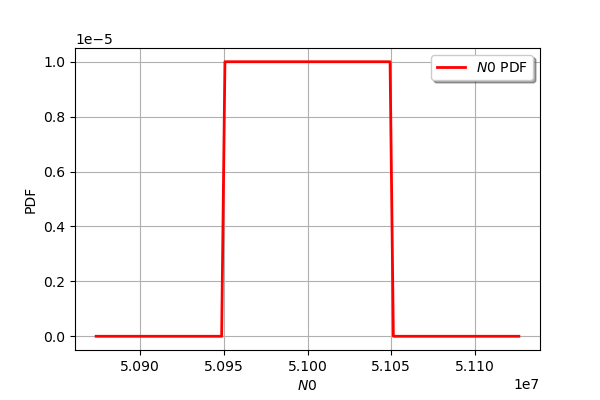

In [4]:
# la population du Corée du sud suit la loi U(50 950 000, 51 050 000)
    
N0 =  ot.Uniform(50950000, 51050000)
N0.setDescription([r"$N0$"])
N0.drawPDF()

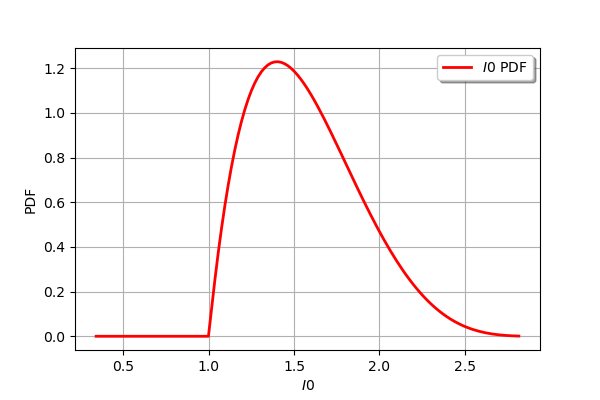

In [5]:
#la population infectious I(0) distribué selon une loi Beta de paramètres B(2, 5, 1, 3)

I0 = ot.Beta(2, 5, 1, 3)
I0.setDescription([r"$I0$"])
I0.drawPDF()

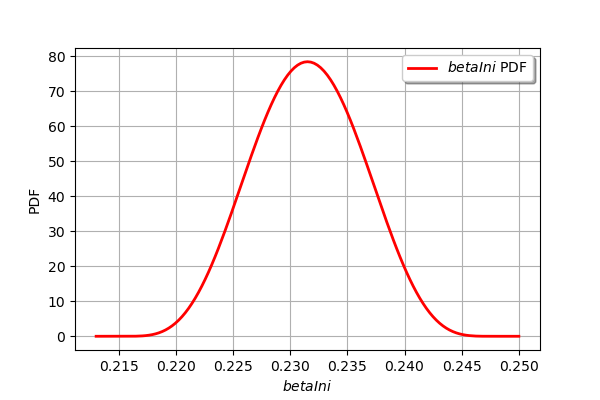

In [6]:
# βini suit une loi Beta B(5.5, 5.5, 0.215, 0.248)
betaIni = ot.Beta(5.5, 5.5, 0.215, 0.248)
betaIni.setDescription([r"$betaIni$"])
betaIni.drawPDF()

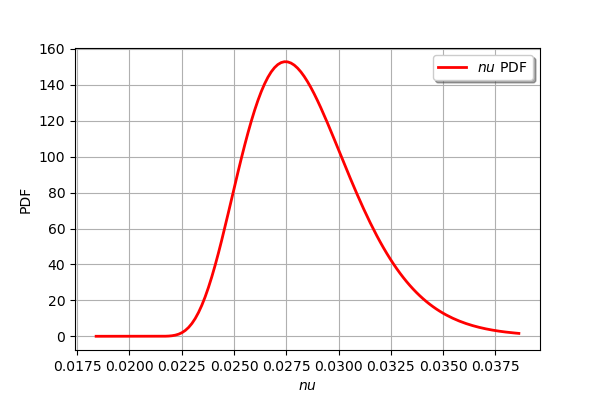

In [7]:
# ν suit une loi Gamma de paramètres G(7.3, 975, 0.021)

nu = ot.Gamma(7.3, 975.0, 0.021)
nu.setDescription([r"$nu$"])
nu.drawPDF()

In [8]:
print("Réponse 2 : Création de la loi de R_0 en utilisant l'algorithme de distibution et la tracéee")

Réponse 2 : Création de la loi de R_0 en utilisant l'algorithme de distibution et la tracéee


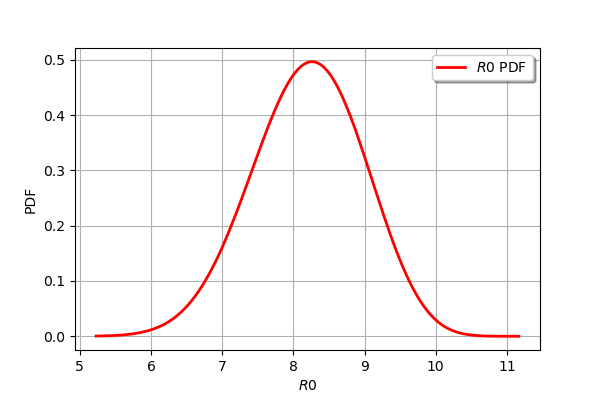

In [9]:
R0 = betaIni/nu
R0.setDescription([r"$R0$"])
R0.drawPDF()

In [10]:
print("On remarque que la loi de R0 suit une loi gausienne.") 
print(" Donc le taux de reproduction connaitra un pic avant de s'etteindre")

On remarque que la loi de R0 suit une loi gausienne.
 Donc le taux de reproduction connaitra un pic avant de s'etteindre


In [11]:
print("Calcul de  la probabilité P(R0<1) avec la methode FORM")

Calcul de  la probabilité P(R0<1) avec la methode FORM


In [12]:
#Calculde probabilité R0<1
h = ot.SymbolicFunction(["x1", "x2"], [" x1/x2"])
#le vecteur aléa d'entrée
dist1 = ot.ComposedDistribution([betaIni, nu])
X1 = ot.RandomVector(dist1)
#le vecteur de sortie
R0 = ot.CompositeRandomVector(h, X1)
#Evénement
s = 1.0
test = ot.Less()
E = ot.ThresholdEvent(R0, test, s)
# Define a solver
optimAlgo = ot.Cobyla()
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)
# Run FORM
algo = ot.FORM(optimAlgo, E, dist1.getMean())
algo.run()
result = algo.getResult()
# Probability
pIni = result.getEventProbability()
print("la probabilité est de pIni =  ",pIni)

la probabilité est de pIni =   1.3482668133182282e-17


In [13]:
print("Réponse 3 : Création de la nouvelle loi de distribution de R0")

Réponse 3 : Création de la nouvelle loi de distribution de R0


In [14]:
# prise en compte des mesures de controle d l'epidemie

#loi uniforme du nouveau temps U(24; 29)
Tnew =  ot.Uniform(24, 29)

In [15]:
#loi gamma du nouveau beta G(2:8; 2870; 0:0183)
betaNew = ot.Gamma(2.8, 2870.0, 0.0183)

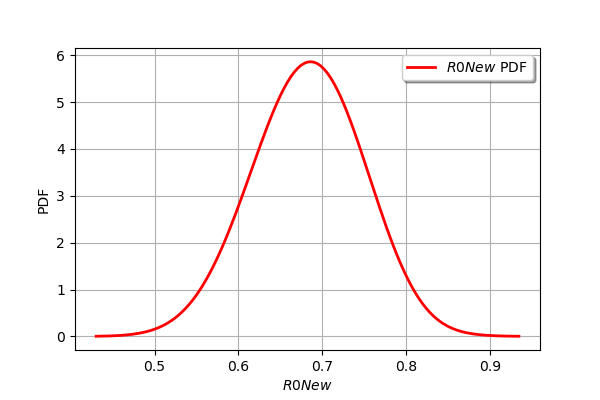

In [16]:
R0New = betaNew/nu
R0New.setDescription([r"$R0New$"])
R0New.drawPDF()

In [17]:
print("Calcul de la nouvelle probabilité de R0")

Calcul de la nouvelle probabilité de R0


In [18]:
#le vecteur aléa d'entrée
dist2 = ot.ComposedDistribution([betaNew, nu])
X2 = ot.RandomVector(dist2)
#le vecteur de sortie
R0New = ot.CompositeRandomVector(h, X2)
#Evénement
s = 1.0
test = ot.Less()
E = ot.ThresholdEvent(R0New, test, s)
# Define a solver
optimAlgo = ot.Cobyla()
optimAlgo.setMaximumEvaluationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)
# Run FORM
algo = ot.FORM(optimAlgo, E, dist2.getMean())
algo.run()
result = algo.getResult()
# Probability
pNew = result.getEventProbability()
print("la probabilité est de pIni =  ",pNew)

la probabilité est de pIni =   0.9999983053253475


In [19]:
print("On a P(R0<1) = 0.999. Donc l'épedemie va s'éteindre ")

On a P(R0<1) = 0.999. Donc l'épedemie va s'éteindre 


In [20]:
print("Réponse 4: Création de X sources d'incertitudes")

Réponse 4: Création de X sources d'incertitudes


In [21]:
# modele aléatoire
#Créer le vecteur X = (N(0), I(0), βini, βnew, tnew, ν) des sources d’incertitudes
marginales = [N0, I0, betaIni, betaNew, Tnew, nu]
dist3 = ot.ComposedDistribution(marginales)
X = ot.RandomVector(dist3)


#  Création de la variable d'intérêt

In [22]:
print("Réponse 1 : Création de la fonction Y=f(X) avec PythonFunction et ComputeMax ")
print("Réponde 2 : Création du vecteur aléatoire Y")


Réponse 1 : Création de la fonction Y=f(X) avec PythonFunction et ComputeMax 
Réponde 2 : Création du vecteur aléatoire Y


In [23]:
#creation de la variable interet
f = ot.PythonFunction(6, 1,SIR.computeMax, n_cpus=-1)
Y = ot.CompositeRandomVector(f, X)
 

In [24]:
print("Réponse 3 : Production de l'échantillon, Calcul de la moyenne et l'écart-type")
print("On trace une estimation de la densité avec KernelSmoothing")
print("On enregistre l'échantillon aux format CSV via exportToCSVFile")

Réponse 3 : Production de l'échantillon, Calcul de la moyenne et l'écart-type
On trace une estimation de la densité avec KernelSmoothing
On enregistre l'échantillon aux format CSV via exportToCSVFile


Moyenne t= 0 h 6 min
Ecart-type t= 0 h 2.4 min


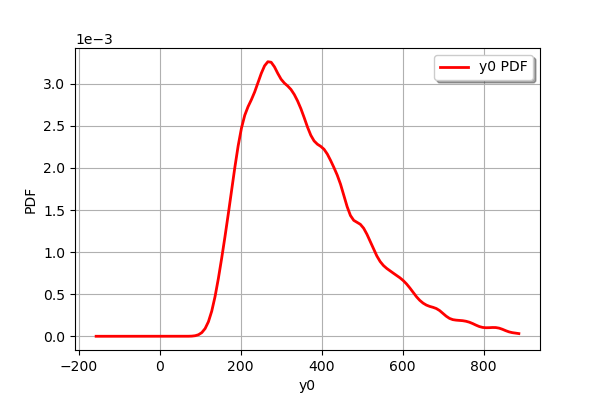

In [25]:
#estimation de la moyenne et de l'écart type 
#sample de n points : echantillon
n = 10000
sampleY = Y.getSample(n)
distY = ot.KernelSmoothing().build(sampleY)
t = distY.getMean()[0]/3600.0
print("Moyenne t=", int(t), "h %.2g" % (60.0*(t-int(t))), "min")
sigma = distY.getStandardDeviation()[0]/3600.0
print("Ecart-type t=", int(sigma), "h %.2g" % (60.0*(sigma-int(sigma))), "min")
distY.drawPDF() 

# Calcul de probabilité d'évenement rare

In [26]:
print("Réponse 1 : Estimation de P(E)")

Réponse 1 : Estimation de P(E)


In [33]:

#calcul de probabilité d'evenement rare
#Calcul de probabilité d’événements rares
s2 = 1000.0
test2 = ot.Greater() 
G = ot.ThresholdEvent(Y, test2, s2)
experiment = ot.MonteCarloExperiment()
myAlgo = ot.ProbabilitySimulationAlgorithm(G, experiment)
myAlgo.setMaximumOuterSampling(1000)
myAlgo.setBlockSize(100) # nombre d'estimations reparties entre 100 et 4 pour 400
#myAlgo.setMaximumCoefficientOfVariation(0.1)
# Perform the simulation
myAlgo.run()
print('Probability estimateMontCarlo=%.6f' % myAlgo.getResult().getProbabilityEstimate())

Probability estimateMontCarlo=0.000580


In [34]:
print("Réponse 2 : Mise en oeuvre de la méthode FORM")

Réponse 2 : Mise en oeuvre de la méthode FORM


In [35]:

#methode FORM pour approximer la probabilité de l'evenement E
    #defini lors du calcu du proba avec montecarlo 
# Run FORM
algoFORM = ot.FORM(optimAlgo, G, dist3.getMean())
algoFORM.run()
resultFORM = algoFORM.getResult()
# Probability
pFORM = resultFORM.getEventProbability()
print("la probabilité avec forme est pFORME = ", pFORM)

la probabilité avec forme est pFORME =  0.0015626254258531132


In [32]:
print("Réponse 3 : L'ordre de grandeur du nombre d'évaluation du modéle avec une variation de 0.1 est de 0.1")

Réponse 3 : L'ordre de grandeur du nombre d'évaluation du modéle avec une variation de 0.1 est de 0.1


In [36]:
print("Réponse 4 : Le coefficient de variation de l'éstimation")

Réponse 4 : Le coefficient de variation de l'éstimation


In [37]:
print("variation = ",myAlgo.getMaximumCoefficientOfVariation())

variation =  0.1


In [38]:
print("Vu que P(E) est petite alors on ne craint pas l'évenement E={Y>1000}")

Vu que P(E) est petite alors on ne craint pas l'évenement E={Y>1000}


In [39]:
print("Le Modéle SIR ")

print("Réponse 1 : Création de XTild")


Le Modéle SIR 
Réponse 1 : Création de XTild


In [40]:
#le modéle SIR modifié
#loi beta de r B(2; 4; 0:9; 1:2)
r = ot.Beta(2.0, 4.0, 0.9, 1.2)
r.setDescription(["r"])
marginales_r = list(marginales)
marginales_r.append(r)
dist_X_r = ot.ComposedDistribution(marginales_r)#xTild
XTild = ot.RandomVector(dist_X_r)


In [41]:
print("Réponse 2 : Création de Modéle augmenté fTild ")
#modéle augmenté fTild =r*f
fTild = ot.PythonFunction(7, 1, SIR2.computeMaxFuzzy)
YTild = ot.CompositeRandomVector(fTild, XTild)

Réponse 2 : Création de Modéle augmenté fTild 


In [42]:
print("Réponse 3 : Création de l'événement redouté ETild")

Réponse 3 : Création de l'événement redouté ETild


In [43]:
#evenement Etild situation redoutée
GTild = ot.ThresholdEvent(YTild, test2, s2)


In [44]:
print("Réponse 4 : Quantification de la probabilité ETild")

# Run FORM
algoFORMTild = ot.FORM(optimAlgo, GTild, dist_X_r.getMean())
algoFORMTild.run()
resultFORMTild = algoFORMTild.getResult()
# Probability
pFORMTild = resultFORMTild.getEventProbability()
print("la probabilité avec forme est pFORMTild = ", pFORMTild)

Réponse 4 : Quantification de la probabilité ETild
la probabilité avec forme est pFORMTild =  0.9999999999999796


# Analyse de sensibilité

In [45]:
print("Réponse 1 :  calcul des indices de Sobol du premiers ordre et totaux")

Réponse 1 :  calcul des indices de Sobol du premiers ordre et totaux


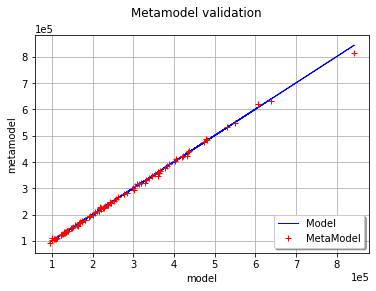

In [46]:
#analyse de sensibilité
#calcul des indices de sobol

input_dimension = dist_X_r.getDimension()
size = 100
degree = 3
basisSize = ot.LinearEnumerateFunction(input_dimension).getStrataCumulatedCardinal(degree)
projection = ot.LeastSquaresStrategy(ot.LeastSquaresMetaModelSelectionFactory(ot.LARS(), ot.CorrectedLeaveOneOut()))
inputSample = dist_X_r.getSample(size)
outputSample = fTild(inputSample)
basis = ot.OrthogonalProductPolynomialFactory([ot.StandardDistributionPolynomialFactory(ot.AdaptiveStieltjesAlgorithm(distM)) for distM in marginales_r])
algo_meta = ot.FunctionalChaosAlgorithm(inputSample, outputSample, dist_X_r, ot.FixedStrategy(basis, basisSize), projection)
algo_meta.run()
result_meta = algo_meta.getResult()
meta_modele = result_meta.getMetaModel()
#print(meta_modele)
inputValidation = dist_X_r.getSample(size)
outputValidation = fTild(inputValidation)
validation = ot.MetaModelValidation(inputValidation, outputValidation, meta_modele)
graph = validation.drawValidation()
ot.Show(graph)
post_processing = ot.FunctionalChaosSobolIndices(result_meta)

In [47]:
print("Indices de Sobol de premier ordre")

Indices de Sobol de premier ordre


In [48]:
#indice de sobol
sobol = ot.Sample(1, input_dimension)
sobol.setDescription(dist_X_r.getDescription())
for j in range(input_dimension):
    sobol[0,j]=100.0 * post_processing.getSobolIndex(j)
print("Sobol indices ",sobol)

Sobol indices      [ X0           X1           X2           X3           X4           X5           X6           ]
0 : [  0.000835125 18.4298       7.13058     17.6962      50.2465       0            0           ]


In [49]:
print("Indices de Sobol totaux")

Indices de Sobol totaux


In [50]:
#indice de sobol totaux
sobolT = ot.Sample(1, input_dimension)
sobolT.setDescription(dist_X_r.getDescription())
for j in range(input_dimension):
    sobolT[0,j]=100.0 * post_processing.getSobolTotalIndex(j)
print("Sobol total indices", sobolT)

Sobol total indices     [ X0          X1          X2          X3          X4          X5          X6          ]
0 : [  0.0166749  21.4065      8.79989    21.0188     55.4949      0.00525305  0.00272986 ]


In [51]:
print("Réponse 2 : Estimation de l'esperance de XTild conditionnée à l'évenement espéré approché deETild")

Réponse 2 : Estimation de l'esperance de XTild conditionnée à l'évenement espéré approché deETild


In [52]:
#Estimation esperance de XTild/ETild
size = 10000
sample_X = XTild.getSample(size)
sample_Y = meta_modele(sample_X)
conditional_sample = ot.Sample(0, sample_X.getDimension())
for j in range(size):
    if sample_Y[j, 0] < 0.0:
        conditional_sample.add(sample_X[j])
print("size=", conditional_sample.getSize())
# Esperance conditionnelle
esperance_conditionnelle = conditional_sample.computeMean()
print("E[X|f(X)\in D_f]= ",esperance_conditionnelle )

#Facteur d'inportance
# Facteurs d'importance dans l'espace standard\n",
u = dist_X_r.getIsoProbabilisticTransformation()(conditional_sample).computeMean()
IF = ot.Sample(1, input_dimension)
IF.setDescription(dist_X_r.getDescription())
for j in range(input_dimension):
    IF[0, j] = (100.0 * u[j]**2 / u.normSquare())
print("Importance factors", IF)

size= 0


RuntimeError: InternalException : Error: cannot compute the mean of an empty sample.

In [ ]:
 print("")